In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats as t
plt.style.use("dark_background")


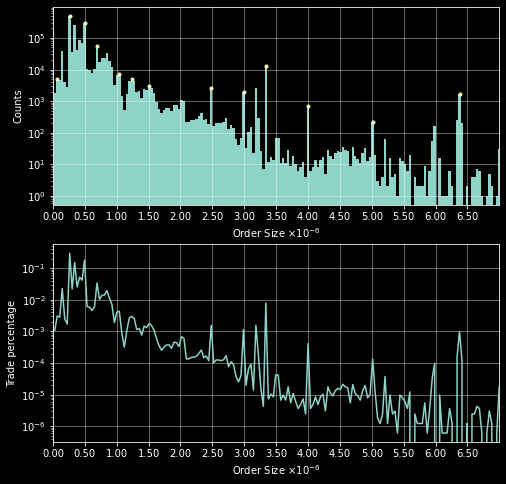

In [217]:
from matplotlib.ticker import StrMethodFormatter
df = pd.read_csv("../data_cleaned/orders.csv")
# Histogram
nbins = int(np.sqrt(df.shape[0])) * 2
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
counts, bins, patches = ax1.hist(df * 10 ** -6, nbins, log=True)
from scipy.signal import find_peaks
# for local maxima
peaks = find_peaks(counts, threshold=200, distance=5)
mid_bins = np.array((bins[1:] + bins[:-1])/2)
ax1.scatter(mid_bins[peaks[0]], counts[peaks[0]],
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],  marker=".")
ax1.set_xlabel("Order Size $\\times 10^{-6}$")
ax1.set_xlim((0, 7))
ax1.set_yscale("log")
ax1.grid(alpha=0.5)
ax1.set_ylabel("Counts")
ax1.set_xticks([x * .5 for x in range(14)])
ax1.xaxis.set_major_formatter(StrMethodFormatter('{x:1.2f}'))
# Trade percentage
total_volume = counts.sum()
pcts = np.array([])
for vol in counts:
    pcts = np.append(pcts, vol/total_volume)
ax2.plot(mid_bins, pcts)
ax2.set_xlabel("Order Size $\\times 10^{-6}$")
ax2.set_xlim((0, 7))
ax2.set_yscale("log")
ax2.grid(alpha=0.5)
ax2.set_ylabel("Trade percentage")
ax2.set_xticks([x * .5 for x in range(14)])
ax2.xaxis.set_major_formatter(StrMethodFormatter('{x:1.2f}'))
plt.show()